<a href="https://www.kaggle.com/code/vtrackstar/2024-wnba-league-shot-chart-analysis?scriptVersionId=210104303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ask
* Goals:
   * Analyze shot selection trends across the WNBA for the 2024 season.
   * Evaluate league-wide shooting efficiency from different court zones.
   * Provide visual insights through heatmaps for shot distribution and efficiency.
* Data:
   * Source: Basketball-Reference WNBA Section

## Prepare

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import colors


pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wnba2024stats/2024 WNBA Player Stats - Shooting.csv
/kaggle/input/wnba2024stats/2024 WNBA Player Stats - Advanced.csv
/kaggle/input/wnba2024stats/2024 WNBA Player Stats - PerGame.csv
/kaggle/input/wnba2024stats/2024 WNBA Player Stats - PlaybyPlay.csv


In [2]:
pergame = pd.read_csv('/kaggle/input/wnba2024stats/2024 WNBA Player Stats - PerGame.csv')
advanced = pd.read_csv('/kaggle/input/wnba2024stats/2024 WNBA Player Stats - Advanced.csv')
playbyplay = pd.read_csv('/kaggle/input/wnba2024stats/2024 WNBA Player Stats - PlaybyPlay.csv')
shooting = pd.read_csv('/kaggle/input/wnba2024stats/2024 WNBA Player Stats - Shooting.csv')

In [3]:
pergame.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A'ja Wilson,LVA,C,38,1308,38,38,34.4,10.1,19.6,0.518,0.5,1.6,0.317,9.6,18.0,0.536,6.1,7.2,0.844,2.1,11.9,2.3,1.8,2.6,1.3,1.8,26.9
1,Arike Ogunbowale,DAL,G,38,1465,38,38,38.6,7.3,19.2,0.383,2.9,8.5,0.346,4.4,10.7,0.412,4.6,5.0,0.921,0.8,4.6,5.1,2.1,0.3,2.7,2.8,22.2
2,Kahleah Copper,PHO,G-F,37,1197,37,37,32.4,7.4,17.0,0.435,1.9,5.9,0.314,5.5,11.0,0.500,4.5,5.6,0.807,0.6,4.5,2.3,0.8,0.1,3.0,3.3,21.1
3,Napheesa Collier,MIN,F,34,1181,34,34,34.7,7.9,16.0,0.492,0.9,2.9,0.310,7.0,13.1,0.533,3.7,4.6,0.804,2.2,9.7,3.4,1.9,1.4,2.1,2.6,20.4
4,Breanna Stewart,NYL,F,38,1243,38,38,32.7,7.0,15.2,0.458,1.2,4.1,0.295,5.8,11.1,0.519,5.3,6.3,0.845,1.6,8.5,3.5,1.7,1.3,1.7,2.1,20.4


In [4]:
advanced
advanced1 = advanced[['Player', 'PER', 'TS%', 'eFG%', '3PAr', 'FTr', 'ORB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS', 'WS/40']]
advanced1.head()

,Player,PER,TS%,eFG%,3PAr,FTr,ORB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/40
0,Arike Ogunbowale,18.6,0.520,0.460,0.444,0.261,2.3,7.0,22.4,2.8,0.6,11.2,26.8,108,114,3.7,-0.4,3.3,0.089
1,Caitlin Clark,18.8,0.583,0.522,0.612,0.310,1.2,9.4,39.1,1.9,1.7,25.3,27.7,103,109,2.3,0.7,3.0,0.086
2,Dearica Hamby,19.2,0.566,0.541,0.168,0.379,5.4,16.5,20.6,2.5,0.5,16.2,24.1,103,104,1.9,1.5,3.4,0.101
3,Allisha Gray,16.0,0.526,0.471,0.397,0.365,3.7,7.5,15.1,1.6,2.0,10.2,22.4,106,104,2.3,1.5,3.8,0.113
4,A'ja Wilson,34.9,0.591,0.531,0.081,0.370,7.2,19.9,14.1,2.6,6.3,5.3,32.2,119,92,7.0,3.8,10.9,0.332


In [5]:
playbyplay
pbp = playbyplay[['Player', 'OnCourt', 'On-Off', 'BadPassTO', 'LostBallTO', 'ShootFoulCmtd', 'OffFoulCmtd', 'ShootFoulDrawn', 'OffFoulCmtd.1', 'PtsGenbyAsts', 'And1s', 'FGA_Blkd']]
pbp.head()

,Player,OnCourt,On-Off,BadPassTO,LostBallTO,ShootFoulCmtd,OffFoulCmtd,ShootFoulDrawn,OffFoulCmtd.1,PtsGenbyAsts,And1s,FGA_Blkd
0,Arike Ogunbowale,-8.3,13.8,68,12,26,19,73,11,430,13,21
1,Caitlin Clark,-2.7,7.0,150,44,59,12,48,10,751,13,28
2,Dearica Hamby,-10.5,-5.1,36,43,44,22,99,3,328,25,75
3,Allisha Gray,-0.9,15.5,32,15,43,7,82,18,248,19,25
4,A'ja Wilson,6.5,-2.7,20,17,42,9,131,2,223,30,48


In [6]:
shooting
shot = shooting[['Player', 'AvgFGDist', '%FGA_2P', '%FGA_0-3', '%FGA_3-10', '%FGA_10-16', '%FGA_16-3P', '%FGA_3P', 'FG%_2P', 'FG%_0-3', 'FG%_3-10', 'FG%_10-16', 'FG%_16-3P', 'FG%_3P', '%FGA_Astd_2P', '%FGA_Astd_3P', '%3PA_Corner', '3P%_Corner']]
shot.head()

,Player,AvgFGDist,%FGA_2P,%FGA_0-3,%FGA_3-10,%FGA_10-16,%FGA_16-3P,%FGA_3P,FG%_2P,FG%_0-3,FG%_3-10,FG%_10-16,FG%_16-3P,FG%_3P,%FGA_Astd_2P,%FGA_Astd_3P,%3PA_Corner,3P%_Corner
0,Arike Ogunbowale,17.5,0.556,0.093,0.118,0.181,0.163,0.444,0.412,0.559,0.337,0.364,0.437,0.346,0.359,0.643,0.071,0.348
1,Caitlin Clark,18.9,0.388,0.183,0.124,0.045,0.036,0.612,0.533,0.623,0.472,0.423,0.429,0.344,0.142,0.516,0.017,0.333
2,Dearica Hamby,7.6,0.832,0.411,0.369,0.033,0.019,0.168,0.547,0.647,0.477,0.294,0.200,0.341,0.714,1.000,0.068,0.333
3,Allisha Gray,14.1,0.603,0.210,0.198,0.124,0.071,0.397,0.443,0.617,0.337,0.365,0.361,0.342,0.581,0.942,0.193,0.487
4,A'ja Wilson,10.4,0.919,0.162,0.350,0.246,0.162,0.081,0.536,0.692,0.554,0.421,0.517,0.317,0.699,1.000,0.117,0.286


In [7]:
merged1 = pd.merge(pergame, advanced1, on='Player', how='left').merge(pbp, on='Player', how='left').merge(shot, on='Player', how='left')
## merged1.head()
merged = merged1.drop(['G.1', 'MP.1'], axis=1)
merged.head()

,Player,Team,Pos,G,MP,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,eFG%,3PAr,FTr,ORB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/40,OnCourt,On-Off,BadPassTO,LostBallTO,ShootFoulCmtd,OffFoulCmtd,ShootFoulDrawn,OffFoulCmtd.1,PtsGenbyAsts,And1s,FGA_Blkd,AvgFGDist,%FGA_2P,%FGA_0-3,%FGA_3-10,%FGA_10-16,%FGA_16-3P,%FGA_3P,FG%_2P,FG%_0-3,FG%_3-10,FG%_10-16,FG%_16-3P,FG%_3P,%FGA_Astd_2P,%FGA_Astd_3P,%3PA_Corner,3P%_Corner
0,A'ja Wilson,LVA,C,38,1308,38,10.1,19.6,0.518,0.5,1.6,0.317,9.6,18.0,0.536,6.1,7.2,0.844,2.1,11.9,2.3,1.8,2.6,1.3,1.8,26.9,34.9,0.591,0.531,0.081,0.370,7.2,19.9,14.1,2.6,6.3,5.3,32.2,119,92,7.0,3.8,10.9,0.332,6.5,-2.7,20,17,42,9,131,2,223,30,48,10.4,0.919,0.162,0.350,0.246,0.162,0.081,0.536,0.692,0.554,0.421,0.517,0.317,0.699,1.000,0.117,0.286
1,Arike Ogunbowale,DAL,G,38,1465,38,7.3,19.2,0.383,2.9,8.5,0.346,4.4,10.7,0.412,4.6,5.0,0.921,0.8,4.6,5.1,2.1,0.3,2.7,2.8,22.2,18.6,0.520,0.460,0.444,0.261,2.3,7.0,22.4,2.8,0.6,11.2,26.8,108,114,3.7,-0.4,3.3,0.089,-8.3,13.8,68,12,26,19,73,11,430,13,21,17.5,0.556,0.093,0.118,0.181,0.163,0.444,0.412,0.559,0.337,0.364,0.437,0.346,0.359,0.643,0.071,0.348
2,Kahleah Copper,PHO,G-F,37,1197,37,7.4,17.0,0.435,1.9,5.9,0.314,5.5,11.0,0.500,4.5,5.6,0.807,0.6,4.5,2.3,0.8,0.1,3.0,3.3,21.1,16.4,0.544,0.490,0.350,0.330,2.4,8.2,14.2,1.2,0.2,13.3,31.8,99,111,0.9,0.2,1.1,0.037,-5.4,-3.4,45,45,38,12,98,7,205,17,46,13.6,0.650,0.205,0.223,0.108,0.113,0.350,0.500,0.729,0.386,0.471,0.338,0.314,0.446,0.942,0.218,0.292
3,Napheesa Collier,MIN,F,34,1181,34,7.9,16.0,0.492,0.9,2.9,0.310,7.0,13.1,0.533,3.7,4.6,0.804,2.2,9.7,3.4,1.9,1.4,2.1,2.6,20.4,25.1,0.565,0.520,0.183,0.290,7.8,16.2,18.8,2.8,3.6,10.2,26.7,112,91,3.7,3.7,7.4,0.250,13.9,20.2,21,27,37,14,72,5,292,19,37,10.8,0.817,0.215,0.336,0.160,0.106,0.183,0.533,0.701,0.443,0.483,0.552,0.310,0.734,0.968,0.110,0.545
4,Breanna Stewart,NYL,F,38,1243,38,7.0,15.2,0.458,1.2,4.1,0.295,5.8,11.1,0.519,5.3,6.3,0.845,1.6,8.5,3.5,1.7,1.3,1.7,2.1,20.4,26.4,0.569,0.498,0.270,0.412,5.8,15.0,19.4,2.6,3.3,8.7,27.1,117,94,5.4,3.4,8.7,0.281,11.4,0.4,28,12,31,17,111,3,347,19,21,12.2,0.730,0.161,0.332,0.189,0.048,0.270,0.519,0.753,0.505,0.404,0.286,0.295,0.749,0.870,0.167,0.346


In [8]:
merged['FGATot'] = merged['FGA'] * merged['G']
merged['FGTot'] = merged['FG'] * merged['G']
merged['FGA_0-3'] = merged['%FGA_0-3'] * merged['FGATot']
merged['FGA_3-10'] = merged['%FGA_3-10'] * merged['FGATot']
merged['FGA_10-16'] = merged['%FGA_10-16'] * merged['FGATot']
merged['FGA_16-3P'] = merged['%FGA_16-3P'] * merged['FGATot']
merged['FGA_3P'] = merged['%FGA_3P'] * merged['FGATot']
merged['FG_0-3Tot'] = merged['FG%_0-3'] * merged['FGA_0-3']
merged['FG_3-10Tot'] = merged['FG%_3-10'] * merged['FGA_3-10']
merged['FG_10-16Tot'] = merged['FG%_10-16'] * merged['FGA_10-16']
merged['FG_16-3PTot'] = merged['FG%_16-3P'] * merged['FGA_16-3P']
merged['FG_3PTot'] = merged['FG%_3P'] * merged['FGA_3P']
merged.head()

,Player,Team,Pos,G,MP,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,eFG%,3PAr,FTr,ORB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/40,OnCourt,On-Off,BadPassTO,LostBallTO,ShootFoulCmtd,OffFoulCmtd,ShootFoulDrawn,OffFoulCmtd.1,PtsGenbyAsts,And1s,FGA_Blkd,AvgFGDist,%FGA_2P,%FGA_0-3,%FGA_3-10,%FGA_10-16,%FGA_16-3P,%FGA_3P,FG%_2P,FG%_0-3,FG%_3-10,FG%_10-16,FG%_16-3P,FG%_3P,%FGA_Astd_2P,%FGA_Astd_3P,%3PA_Corner,3P%_Corner,FGATot,FGTot,FGA_0-3,FGA_3-10,FGA_10-16,FGA_16-3P,FGA_3P,FG_0-3Tot,FG_3-10Tot,FG_10-16Tot,FG_16-3PTot,FG_3PTot
0,A'ja Wilson,LVA,C,38,1308,38,10.1,19.6,0.518,0.5,1.6,0.317,9.6,18.0,0.536,6.1,7.2,0.844,2.1,11.9,2.3,1.8,2.6,1.3,1.8,26.9,34.9,0.591,0.531,0.081,0.370,7.2,19.9,14.1,2.6,6.3,5.3,32.2,119,92,7.0,3.8,10.9,0.332,6.5,-2.7,20,17,42,9,131,2,223,30,48,10.4,0.919,0.162,0.350,0.246,0.162,0.081,0.536,0.692,0.554,0.421,0.517,0.317,0.699,1.000,0.117,0.286,744.8,383.8,120.6576,260.6800,183.2208,120.6576,60.3288,83.495059,144.416720,77.135957,62.379979,19.12423
1,Arike Ogunbowale,DAL,G,38,1465,38,7.3,19.2,0.383,2.9,8.5,0.346,4.4,10.7,0.412,4.6,5.0,0.921,0.8,4.6,5.1,2.1,0.3,2.7,2.8,22.2,18.6,0.520,0.460,0.444,0.261,2.3,7.0,22.4,2.8,0.6,11.2,26.8,108,114,3.7,-0.4,3.3,0.089,-8.3,13.8,68,12,26,19,73,11,430,13,21,17.5,0.556,0.093,0.118,0.181,0.163,0.444,0.412,0.559,0.337,0.364,0.437,0.346,0.359,0.643,0.071,0.348,729.6,277.4,67.8528,86.0928,132.0576,118.9248,323.9424,37.929715,29.013274,48.068966,51.970138,112.08407
2,Kahleah Copper,PHO,G-F,37,1197,37,7.4,17.0,0.435,1.9,5.9,0.314,5.5,11.0,0.500,4.5,5.6,0.807,0.6,4.5,2.3,0.8,0.1,3.0,3.3,21.1,16.4,0.544,0.490,0.350,0.330,2.4,8.2,14.2,1.2,0.2,13.3,31.8,99,111,0.9,0.2,1.1,0.037,-5.4,-3.4,45,45,38,12,98,7,205,17,46,13.6,0.650,0.205,0.223,0.108,0.113,0.350,0.500,0.729,0.386,0.471,0.338,0.314,0.446,0.942,0.218,0.292,629.0,273.8,128.9450,140.2670,67.9320,71.0770,220.1500,94.000905,54.143062,31.995972,24.024026,69.12710
3,Napheesa Collier,MIN,F,34,1181,34,7.9,16.0,0.492,0.9,2.9,0.310,7.0,13.1,0.533,3.7,4.6,0.804,2.2,9.7,3.4,1.9,1.4,2.1,2.6,20.4,25.1,0.565,0.520,0.183,0.290,7.8,16.2,18.8,2.8,3.6,10.2,26.7,112,91,3.7,3.7,7.4,0.250,13.9,20.2,21,27,37,14,72,5,292,19,37,10.8,0.817,0.215,0.336,0.160,0.106,0.183,0.533,0.701,0.443,0.483,0.552,0.310,0.734,0.968,0.110,0.545,544.0,268.6,116.9600,182.7840,87.0400,57.6640,99.5520,81.988960,80.973312,42.040320,31.830528,30.86112
4,Breanna Stewart,NYL,F,38,1243,38,7.0,15.2,0.458,1.2,4.1,0.295,5.8,11.1,0.519,5.3,6.3,0.845,1.6,8.5,3.5,1.7,1.3,1.7,2.1,20.4,26.4,0.569,0.498,0.270,0.412,5.8,15.0,19.4,2.6,3.3,8.7,27.1,117,94,5.4,3.4,8.7,0.281,11.4,0.4,28,12,31,17,111,3,347,19,21,12.2,0.730,0.161,0.332,0.189,0.048,0.270,0.519,0.753,0.505,0.404,0.286,0.295,0.749,0.870,0.167,0.346,577.6,266.0,92.9936,191.7632,109.1664,27.7248,155.9520,70.024181,96.840416,44.103226,7.929293,46.00584


## Process

In [9]:
totals_fg_fga = merged[['FGTot', 'FGATot', 'FGA_0-3', 'FGA_3-10', 'FGA_10-16', 'FGA_16-3P', 'FGA_3P', 'FG_0-3Tot', 'FG_3-10Tot', 'FG_10-16Tot',	'FG_16-3PTot', 'FG_3PTot']].sum()
totals_fg_fga

FGTot          14352.700000
FGATot         32789.200000
FGA_0-3         6983.562300
FGA_3-10        8174.881300
FGA_10-16       3565.838600
FGA_16-3P       3095.170700
FGA_3P         10966.639500
FG_0-3Tot       4567.908417
FG_3-10Tot      3533.211261
FG_10-16Tot     1377.420924
FG_16-3PTot     1174.454063
FG_3PTot        3708.621380
dtype: float64

In [10]:
fg_percentage_0_3 = totals_fg_fga['FG_0-3Tot'] / totals_fg_fga['FGA_0-3']
fg_percentage_3_10 = totals_fg_fga['FG_3-10Tot'] / totals_fg_fga['FGA_3-10']
fg_percentage_10_16 = totals_fg_fga['FG_10-16Tot'] / totals_fg_fga['FGA_10-16']
fg_percentage_16_3P = totals_fg_fga['FG_16-3PTot'] / totals_fg_fga['FGA_16-3P']
fg_percentage_3P = totals_fg_fga['FG_3PTot'] / totals_fg_fga['FGA_3P']

In [11]:
shot_data = {
    'Shot Range': ['0-3 ft', '3-10 ft', '10-16 ft', '16 ft to 3P', '3P'],
    'FGA': [
        totals_fg_fga['FGA_0-3'],
        totals_fg_fga['FGA_3-10'],
        totals_fg_fga['FGA_10-16'],
        totals_fg_fga['FGA_16-3P'],
        totals_fg_fga['FGA_3P']
    ],
    'Shooting Percentage': [
        fg_percentage_0_3,
        fg_percentage_3_10,
        fg_percentage_10_16,
        fg_percentage_16_3P,
        fg_percentage_3P
    ]
}

shot_df = pd.DataFrame(shot_data)

## Analyze and Share

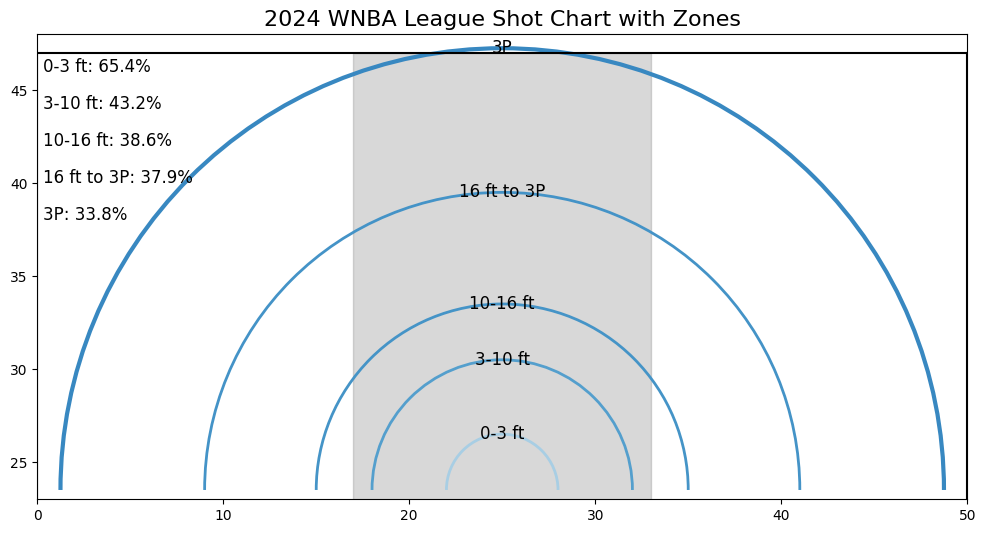

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

# Define the half-court layout (dimensions in feet)
court_length = 50
court_width = 47
paint_width = 16

# Draw court boundaries
ax.plot([0, court_length], [0, 0], color='black')  # Bottom boundary
ax.plot([0, 50], [court_width, court_width], color='black')  # Top boundary
ax.plot([0, 0], [0, court_width], color='black')  # Left boundary
ax.plot([court_length, court_length], [0, court_width], color='black')  # Right boundary

# Draw the paint (free-throw area)
paint = plt.Rectangle((court_length / 2 - paint_width / 2, 0), paint_width, court_width, color='gray', alpha=0.3)
ax.add_patch(paint)

# Function to draw an arc
def draw_arc(ax, center, radius, color, linewidth=1, linestyle='-', label=None):
    arc = Arc(center, width=radius * 2, height=radius * 2, angle=0, theta1=0, theta2=180,
              color=color, lw=linewidth, linestyle=linestyle)
    ax.add_patch(arc)
    if label:
        ax.text(center[0] + radius * np.cos(np.radians(90)), center[1] + radius, label,
                horizontalalignment='center', verticalalignment='center', fontsize=12)

# Normalize shooting percentages to map to a color range (blue to red)
norm = colors.Normalize(vmin=0, vmax=1)

# Color Map: Blue to Red (low percentage -> blue, high percentage -> red)
cmap = plt.cm.Blues_r

# Center for the court (this centers it in the middle of the court)
center = (court_length * 0.5, court_width * 0.5)  # Adjusted to ensure it is centered

# Adjusting the center of the arc for proper positioning
arc_center = (court_length * 0.5, court_width * 0.5)  # Arc's center position (middle of the court)

# Draw each arc and label it with color based on shooting percentage
arc_radius_0_3 = 3  # 0-3 ft
draw_arc(ax, arc_center, arc_radius_0_3, color=cmap(norm(fg_percentage_0_3)), linewidth=2, label='0-3 ft')

arc_radius_3_10 = 7  # 3-10 ft
draw_arc(ax, arc_center, arc_radius_3_10, color=cmap(norm(fg_percentage_3_10)), linewidth=2, label='3-10 ft')

arc_radius_10_16 = 10  # 10-16 ft
draw_arc(ax, arc_center, arc_radius_10_16, color=cmap(norm(fg_percentage_10_16)), linewidth=2, label='10-16 ft')

arc_radius_16_3P = 16  # 16 ft to 3-point range
draw_arc(ax, arc_center, arc_radius_16_3P, color=cmap(norm(fg_percentage_16_3P)), linewidth=2, label='16 ft to 3P')

arc_radius_3P = 23.75  # Standard NBA 3-point arc radius
draw_arc(ax, arc_center, arc_radius_3P, color=cmap(norm(fg_percentage_3P)), linewidth=3, label='3P')

# Labels and Title
ax.set_title("2024 WNBA League Shot Chart with Zones", fontsize=16)
ax.set_xlim([0, court_length])
ax.set_ylim([23, 48])

# Add legend with shot ranges and shooting percentages in the top-left corner
legend_x = 0.3  # X position for the legend (set to a small value to move it to the left)
legend_y = court_width - 0.25  # Y position for the legend (slightly below the top boundary)

# Add the text for each shot range and percentage
for idx, row in shot_df.iterrows():
    ax.text(legend_x, legend_y - idx * 2, f"{row['Shot Range']}: {row['Shooting Percentage']*100:.1f}%", fontsize=12, 
            horizontalalignment='left', verticalalignment='top')

ax.set_aspect(1)
plt.show()

In [13]:
print("Shot Data Results:")
print(shot_df)

total_fga = shot_df['FGA'].sum()  # Total attempts across all shot ranges
weighted_avg_fg_percentage = (shot_df['FGA'] * shot_df['Shooting Percentage']).sum() / total_fga

print("\nWeighted Average Shooting Percentage (factoring in attempts):")
print(f"{weighted_avg_fg_percentage * 100:.1f}%")

print("\nConclusion:")
for idx, row in shot_df.iterrows():
    print(f"The shooting percentage for the {row['Shot Range']} range is {row['Shooting Percentage']*100:.1f}%, with {row['FGA']:.0f} attempts.")

Shot Data Results:
    Shot Range         FGA  Shooting Percentage
0       0-3 ft   6983.5623             0.654094
1      3-10 ft   8174.8813             0.432203
2     10-16 ft   3565.8386             0.386282
3  16 ft to 3P   3095.1707             0.379447
4           3P  10966.6395             0.338173

Weighted Average Shooting Percentage (factoring in attempts):
43.8%

Conclusion:
The shooting percentage for the 0-3 ft range is 65.4%, with 6984 attempts.
The shooting percentage for the 3-10 ft range is 43.2%, with 8175 attempts.
The shooting percentage for the 10-16 ft range is 38.6%, with 3566 attempts.
The shooting percentage for the 16 ft to 3P range is 37.9%, with 3095 attempts.
The shooting percentage for the 3P range is 33.8%, with 10967 attempts.


## Final Inights
* **Proximity to the Basket:** The most efficient shooting range is within 0-3 feet, where the shooting percentage is the highest at **65.4%**. This is expected, as shots taken close to the basket typically have a higher success rate. Despite having fewer attempts than 3-10 feet, this range demonstrates a clear advantage in shooting efficiency.
* **Mid-Range Shooting:** In the 3-10 feet and 10-16 feet ranges, shooting efficiency drops significantly. The shooting percentage in the 3-10 feet range is **43.2%**, while the 10-16 feet range sees a further decline to **38.6%**. The 16 feet to 3-point range shows a shooting percentage of **37.9%**, just slightly lower than the 10-16 ft range. Despite this drop in efficiency, the mid-range shot is still a valuable zone to use strategically, as it’s closer to the 3-point line and can transition easily into long-range shooting.
* **3-Point Shooting:** The 3-point range (16 ft to 3P) has the lowest shooting percentage at **33.8%**. However, because each successful 3-point shot is worth 3 points, the value of this range is higher despite the lower efficiency. With 10,967 attempts, the volume of 3-point shots makes it a critical factor in the player's overall scoring. While the percentage is lower, the ability to make 3-pointers can provide a significant scoring advantage when the player is successful.
* **Weighted Average:** When factoring in shot attempts across all ranges, the overall weighted average shooting percentage stands at **43.8%**. This figure provides a more comprehensive view of shooting performance, combining both efficiency and volume, and reflects the tendency of the player to take a significant number of shots from less efficient areas, particularly from beyond the arc.

### Overall Conclusion:
The data highlights a clear trend where shooting accuracy decreases as the distance from the basket increases, with the 0-3 feet range being the most efficient. 3-point shots, despite their lower percentage, are vital for long-term scoring efficiency due to the higher point value. The player should continue to take and improve their 3-point shooting, as the value of each successful 3-pointer outweighs the cost of a lower shooting percentage in this range. The weighted average of **43.8%** underscores the importance of focusing on high-percentage areas near the basket to improve overall shooting performance.